In [1]:
# worley noise

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial import distance

# generate a random point
def generate_points(grid, size_x, size_y, num_points, min_distance_btw_points, max_distance_btw_points):

    # generate first random point
    x = random.randint(0, size_x-1)
    y = random.randint(0, size_y-1)
    grid[x, y] = 1

    # generate the rest of the points with a max distance from previous points
    for i in range(num_points-1):
        
        # generate a number between min_distance_btw_points and max_distance_btw_points
        distance_x = random.randint(min_distance_btw_points, max_distance_btw_points)

        # compute max_distance_y
        max_distance_y = np.sqrt(max_distance_btw_points**2 - distance_x**2)

        # ensure max_distance_y is at least min_distance_btw_points
        if max_distance_y < min_distance_btw_points:
            max_distance_y = min_distance_btw_points

        # generate a number between 0 and max_distance_y
        distance_y = random.randint(min_distance_btw_points, int(max_distance_y))

        # generate a random sign
        sign_x = random.choice([-1, 1])
        sign_y = random.choice([-1, 1])

        # generate the new point
        new_x = x + sign_x * distance_x
        new_y = y + sign_y * distance_y

        # if new points are out of the grid, use continues boundaries
        if new_x < 0:
            new_x = size_x + new_x
        if new_x >= size_x:
            new_x = new_x - size_x
        
        if new_y < 0:
            new_y = size_y + new_y
        if new_y >= size_y:
            new_y = new_y - size_y

        # add the new point to the grid
        grid[new_x, new_y] = 1

        # update x and y
        x = new_x
        y = new_y

    return grid

In [3]:
def circle_to_point(grid):
    size_x, size_y = grid.shape
    
    # Initialize the noise grid
    noise_grid = np.zeros((size_x, size_y))
    
    # Get the coordinates of the points where grid == 1
    points = np.argwhere(grid == 1)
    
    # If there are no points, return the noise grid as is
    if len(points) == 0:
        return noise_grid
    
    # Define the power-law parameters
    exponent = 1.2
    min_circle = 3
    max_circle = 10
    
    # Generate power-law distributed radii
    u = np.random.uniform(0, 1, size=len(points))  # uniform random values
    radii = min_circle * (1 - u) ** (-1 / (exponent))
    
    # Cap the radii at max_circle
    radii = np.minimum(radii, max_circle)
    
    # Create a grid of all coordinates
    x_indices, y_indices = np.indices((size_x, size_y))
    
    # Reshape points and radii for broadcasting
    points_x = points[:, 0][:, np.newaxis, np.newaxis]
    points_y = points[:, 1][:, np.newaxis, np.newaxis]
    radii_squared = radii[:, np.newaxis, np.newaxis] ** 2
    
    # Calculate the distance squared for all points and all grid coordinates at once
    dist_squared = (x_indices - points_x)**2 + (y_indices - points_y)**2
    
    # Create a mask where any grid point is within the circle of any of the points
    mask = np.any(dist_squared < radii_squared, axis=0)
    
    # Update the noise grid with the mask
    noise_grid[mask] = 1
    
    return noise_grid

In [381]:
import numpy as np

def circle_to_point(grid):
    size_x, size_y = grid.shape
    
    # Initialize the noise grid
    noise_grid = np.zeros((size_x, size_y))
    
    # Get the coordinates of the points where grid == 1
    points = np.argwhere(grid == 1)
    
    # If there are no points, return the noise grid as is
    if len(points) == 0:
        return noise_grid
    
    # Define the power-law parameters
    exponent = 1.2
    min_circle = 3
    max_circle = 10
    
    # Generate power-law distributed radii
    u = np.random.uniform(0, 1, size=len(points))  # uniform random values
    radii = min_circle * (1 - u) ** (-1 / (exponent))
    
    # Cap the radii at max_circle
    radii = np.minimum(radii, max_circle)
    
    # Create a grid of all coordinates
    x_indices, y_indices = np.indices((size_x, size_y))
    
    # Reshape points and radii for broadcasting
    points_x = points[:, 0][:, np.newaxis, np.newaxis]
    points_y = points[:, 1][:, np.newaxis, np.newaxis]
    radii_squared = radii[:, np.newaxis, np.newaxis] ** 2
    
    # Calculate the distance squared for all points and all grid coordinates at once
    dist_squared = (x_indices - points_x)**2 + (y_indices - points_y)**2
    
    # Create a contribution grid where each point accumulates contributions from overlapping circles
    contribution = (dist_squared < radii_squared).astype(float)
    
    # Update the noise grid with the contributions from all circles
    noise_grid +=  np.sum(contribution, axis=0)

    # Eliminate all values equal to 1 and 2
    noise_grid[noise_grid == 1] = 0
    noise_grid[noise_grid == 2] = 0
    
    # Normalize the grid
    min_val = np.min(noise_grid)
    max_val = np.max(noise_grid)
    noise_grid = (noise_grid - min_val) / (max_val - min_val)

    return noise_grid


In [499]:
from matplotlib.colors import LinearSegmentedColormap


    
# Example grid with some points 
grid = generate_points(np.zeros((150, 300)), 100, 200, 300, 1, 13) # grid, size_x, size_y, num_points, min_distance_btw_points, max_distance_btw_points
# add circle
grid_1 = circle_to_point(grid)
grid_2 = circle_to_point(grid)


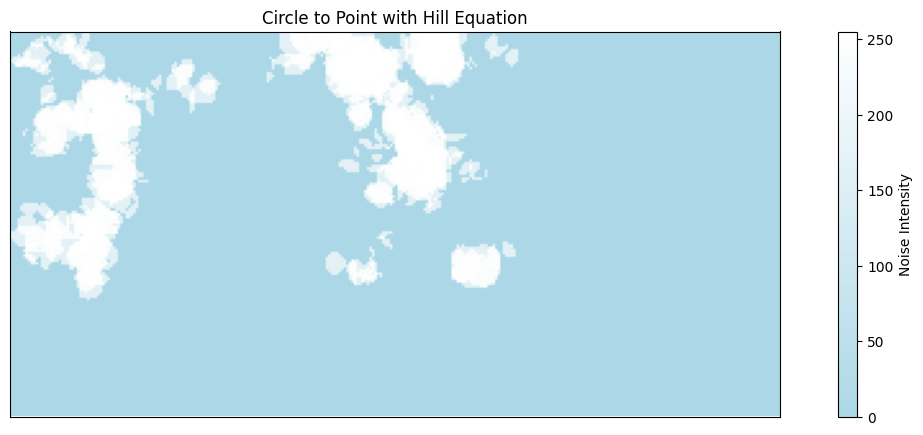

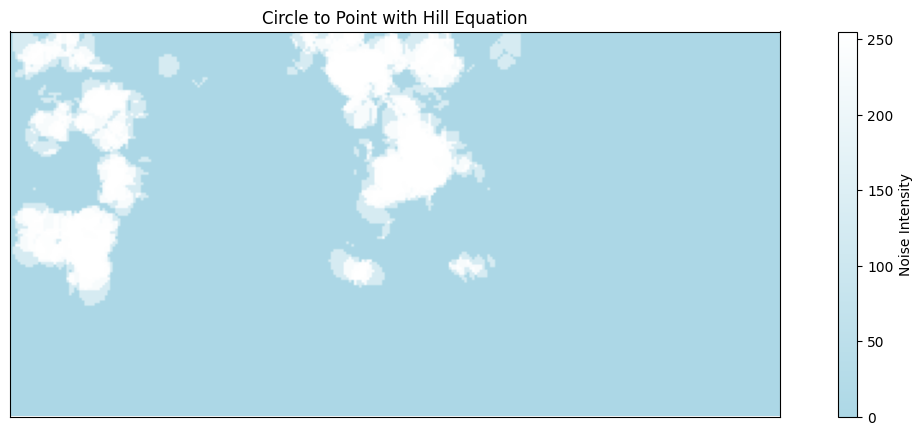

In [500]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Visualization function with a custom colormap
def visualize_grid(grid, my_alpha, title=''):
    # Define a custom colormap from light blue to white
    colors = [(0.678, 0.847, 0.902), (1, 1, 1)]  # Light blue to white (RGB values)
    cmap = LinearSegmentedColormap.from_list('custom_blue_white', colors, N=256)


    
    # Hill equation parameters
    n = my_alpha  # Hill coefficient
    K_d = 0.25 # Dissociation constant, you can adjust this value as needed

    # Apply the Hill equation to the grid values
    hill_grid = (np.clip((grid**n) / (K_d**n + grid**n), 0, 1) )* 255

    # Plot the grid with the custom colormap
    plt.imshow(hill_grid, cmap=cmap)
    
    # Size of the plot
    plt.gcf().set_size_inches(15, 5)
    
    plt.colorbar(label='Noise Intensity')
    plt.title(title)
    plt.grid(False)  # Optional: hide gridlines for a cleaner look
    plt.xticks([])   # Optional: hide x-axis ticks
    plt.yticks([])   # Optional: hide y-axis ticks
    plt.show()

# Visualize the grid
visualize_grid(grid_1, my_alpha=8, title='Circle to Point with Hill Equation')
visualize_grid(grid_2, my_alpha=8, title='Circle to Point with Hill Equation')